In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix as cf

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
heart_data= pd.read_csv("/content/heart.csv")

In [ ]:
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
heart_data=heart_data.drop_duplicates()

In [ ]:
heart_data.shape

(302, 14)

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

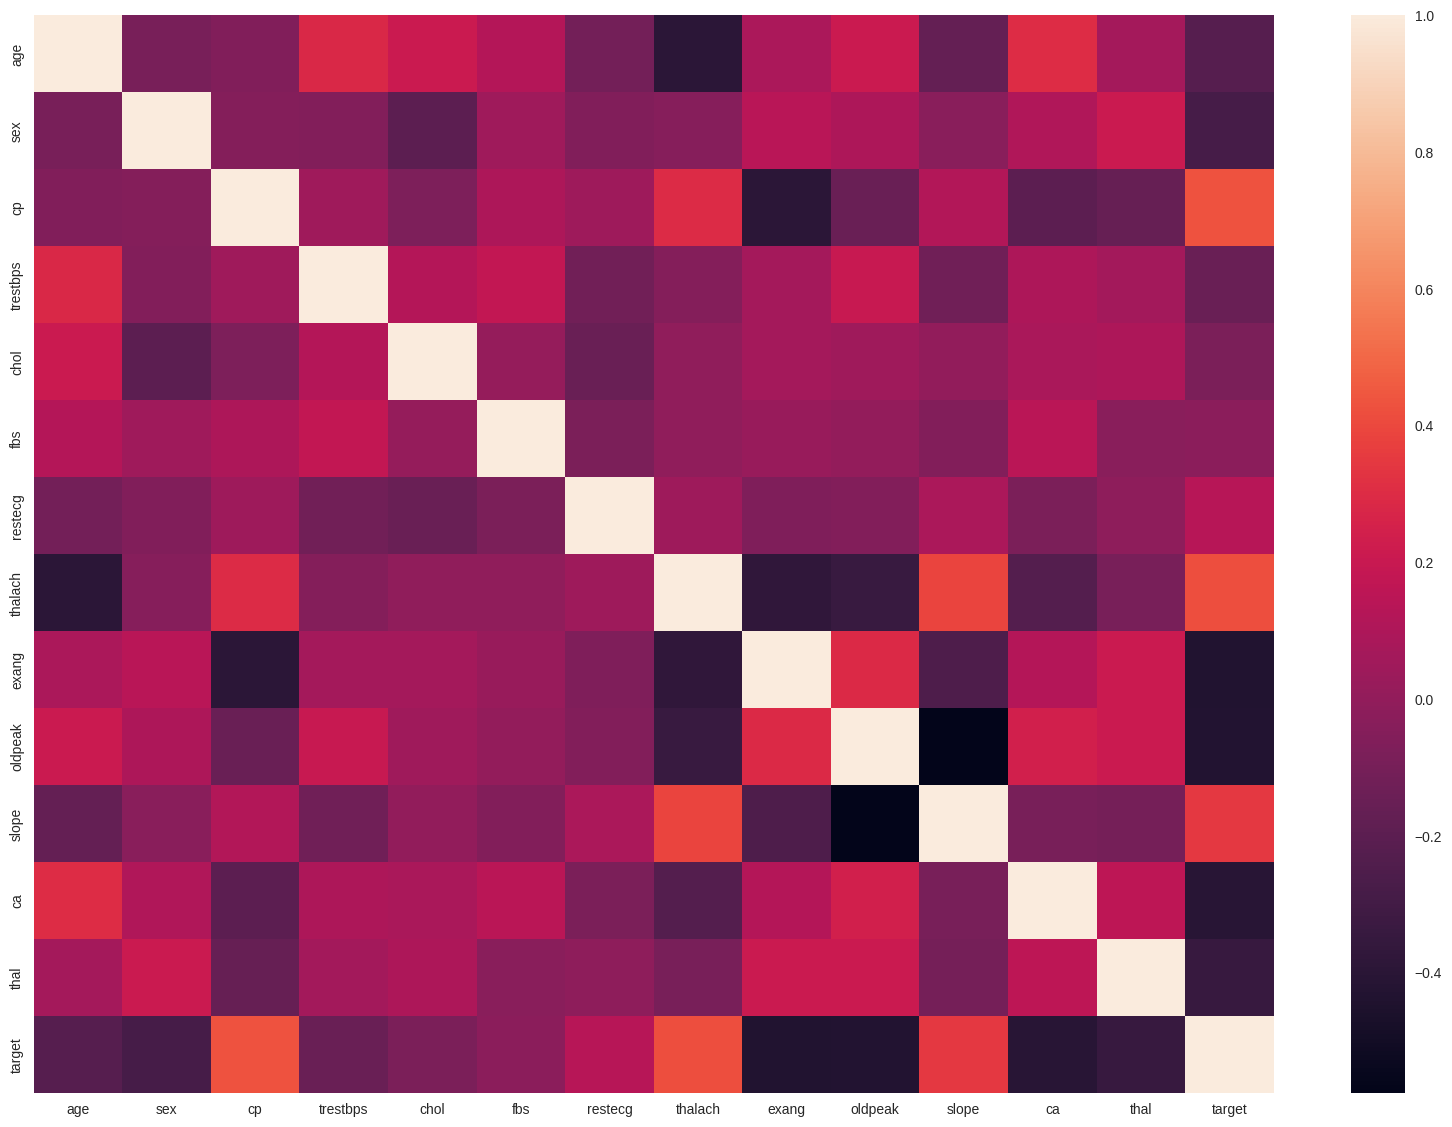

In [ ]:
corr_matrix=heart_data.corr()
 
#Creating a seaborn heatmap
sns.heatmap(corr_matrix)

In [ ]:
heart_data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[columns_to_scale] = standardScaler.fit_transform(heart_data[columns_to_scale])

In [ ]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.8388625592417062


In [ ]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("accuracy =  {}%".format(testing_data_accuracy*100))

accuracy =  85.71428571428571%


In [ ]:
cf =cf(Y_test,X_test_prediction)
cf

array([[37,  5],
       [ 8, 41]])

In [ ]:
TP=cf[1,1]
TN=cf[0,0]
FP=cf[0,1]
FN=cf[1,0]

In [ ]:
print((TP + TN)/ sum(map(sum,cf)))
prec = TP/float(TP+FP)
print(prec)
print("accuracy =  {}%".format(testing_data_accuracy*100))
print("precision =  {}%".format(precision_score(Y_test,X_test_prediction)*100))
print("Recall =  {}%".format(recall_score(Y_test,X_test_prediction)*100))
print("F1 =  {}%".format(f1_score(Y_test,X_test_prediction)*100))

0.8571428571428571
0.8913043478260869
accuracy =  85.71428571428571%
precision =  89.13043478260869%
Recall =  83.6734693877551%
F1 =  86.31578947368422%


In [ ]:
heart_data.to_csv('newHeart.csv')

In [ ]:
input_data = (65,0,2,140,417,1,0,157,0,0.8,2,1,2)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if(prediction[0]==0):
  print("All Ok")
else:
  print("Contact Doctor !!")


Contact Doctor !!


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))

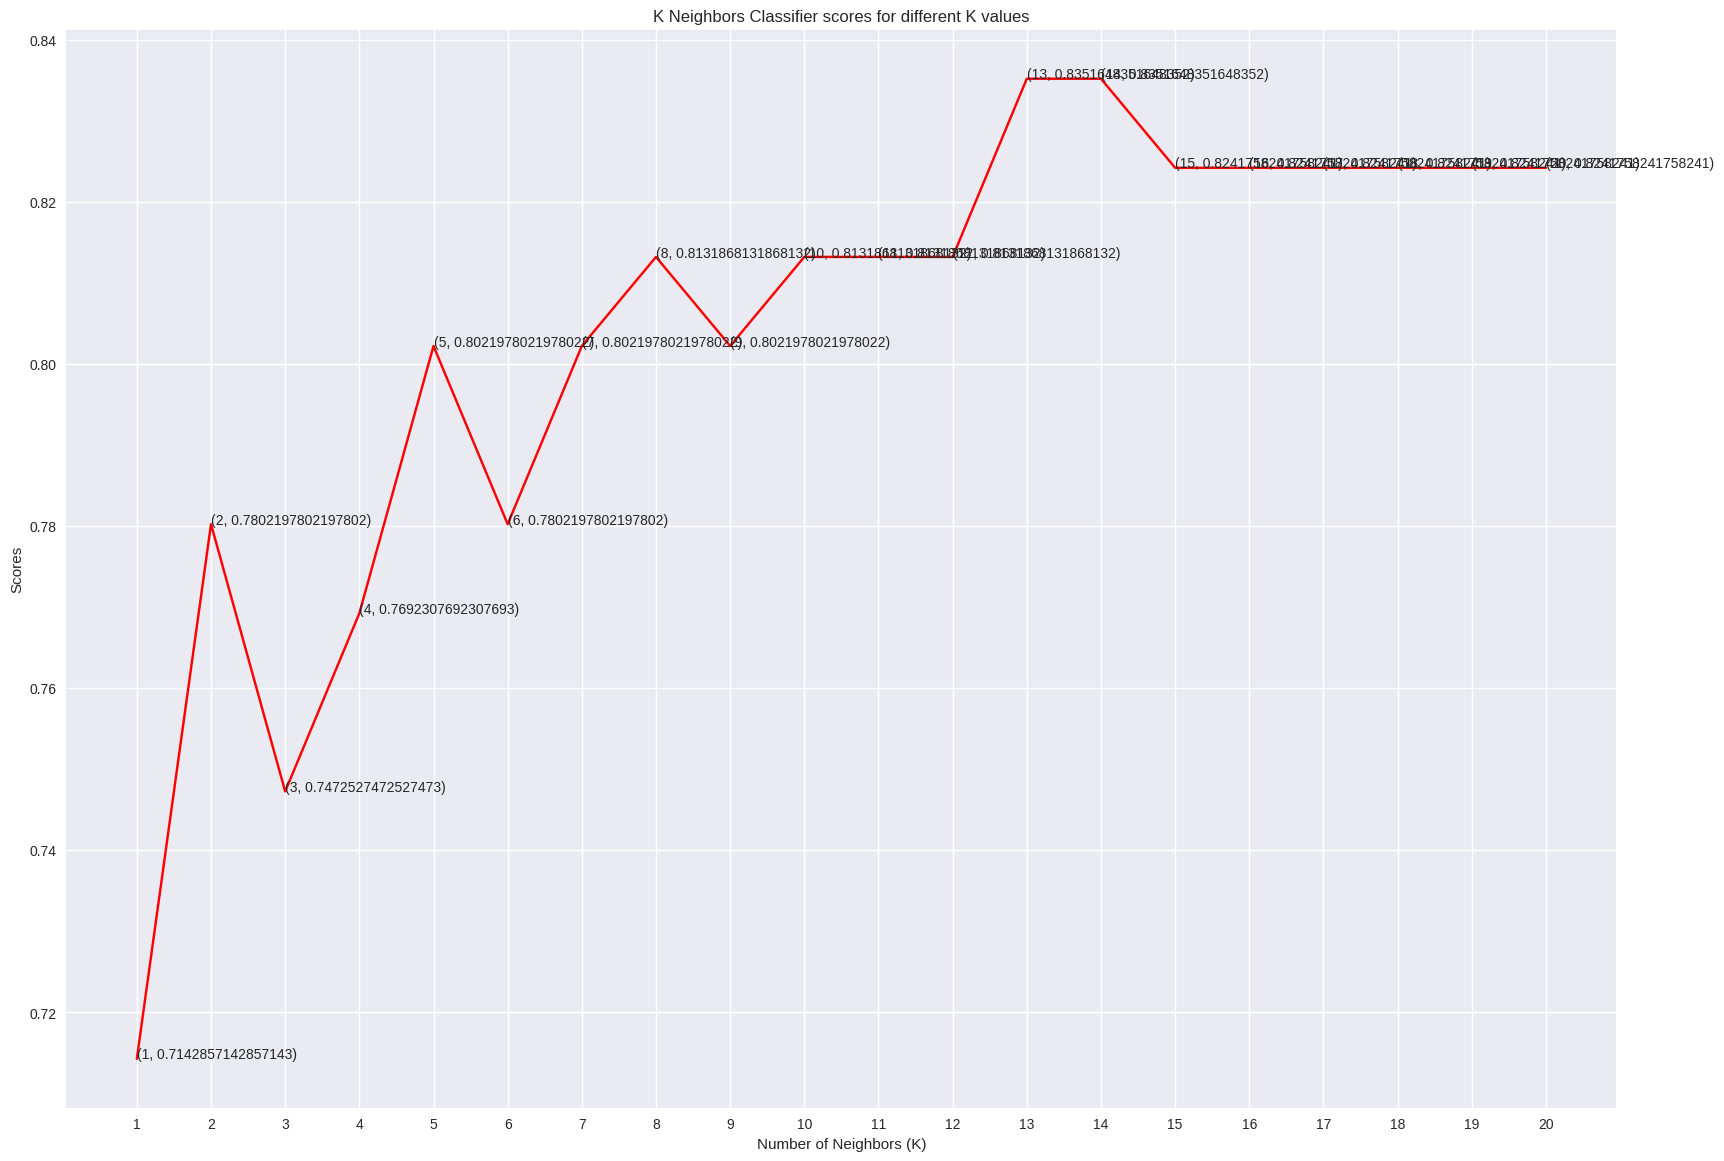

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.savefig('Score_set',dpi=300)

In [ ]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[13]*100, 8))

The score for K Neighbors Classifier is 83.51648351648352% with 8 nieghbors.


In [ ]:
knn_test_prediction = knn_classifier.predict(X_test)
print("accuracy =  {}%".format(knn_scores[13]*100))
print("precision =  {}%".format(precision_score(Y_test,knn_test_prediction)*100))
print("Recall =  {}%".format(recall_score(Y_test,knn_test_prediction)*100))
print("F1 =  {}%".format(f1_score(Y_test,knn_test_prediction)*100))

accuracy =  83.51648351648352%
precision =  80.0%
Recall =  89.79591836734694%
F1 =  84.61538461538463%


0.9271137026239067 0.8926141885325559


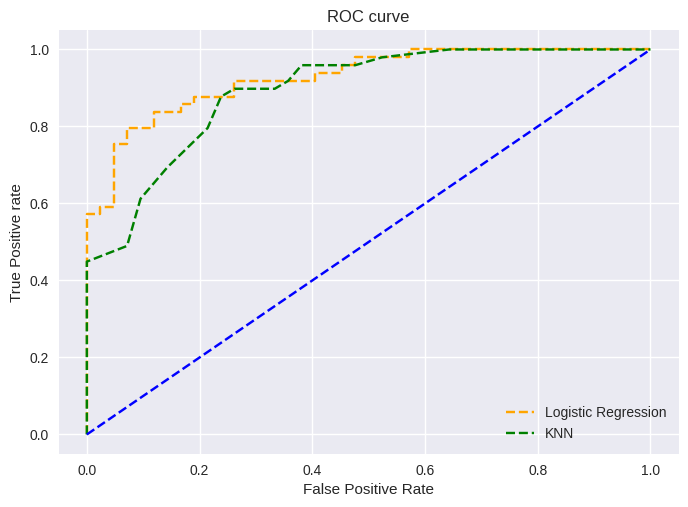

In [ ]:

from sklearn.metrics import roc_curve

pred_prob1 = model.predict_proba(X_test)
pred_prob2 = knn_classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
import pickle

In [ ]:
filename = 'hrt_trained_model.sav'
pickle.dump(model,open(filename,'wb'))


In [ ]:
loaded_model=pickle.load(open('hrt_trained_model.sav','rb'))